# <span style="color:green"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:red"><center>SQL y Tidyverse</center></span>

##   <span style="color:blue">Autores</span>

1. Laura Johana Lizarazo Reyes, ljlizarazore@unal.edu.co

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Pardo Turriago, cepardot@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

5. Oleg Jarma, ojarmam@unal.edu.co
6. Julieth López, julalopezcas@unal.edu.co

## <span style="color:blue">Contenido</span>

* [¿Qué son?](#¿Qué-son?)
* [Importar datos](#Importar-datos)
* [Librería sqldf](#Librería-sqldf)
* [Conjunto tidyverse](#Conjunto-tidyverse)
    - [Librería readr](#Librería-readr)
    - [Librería stringr](#Librería-stringr)
    - [Librería dplyr](#Librería-dplyr)
    - [Librería ggplot2](#Librería-ggplot2)

**NOTA:** El código de esté cuaderno está escrito en lenguaje R.

## **¿Qué son?**

En primer lugar, `sqldf` es un paquete de R para ejecutar sentencias SQL en estructuras de R, el cual está optimizado para mayor comodidad. En segundo lugar, `tidyverse` es una colección de paquetes de R, diseñados para la ciencia de datos. Para mayor infomación, puede mirar este [link de SQL](https://www.rdocumentation.org/packages/sqldf/versions/0.4-11) y este [link de tidyvere](https://www.tidyverse.org/).

In [1]:
#install.packages(c("sqldf","tidyverse","readxl","readr","stringr","dplyr","ggplot2"))

In [1]:
library(sqldf)
#library(tidyverse)
library(readxl)
library(readr); library(stringr); library(dplyr); library(ggplot2)

Warning message:
"package 'sqldf' was built under R version 3.6.3"Loading required package: gsubfn
Warning message:
"package 'gsubfn' was built under R version 3.6.3"Loading required package: proto
Warning message:
"package 'proto' was built under R version 3.6.3"Loading required package: RSQLite
Warning message:
"package 'RSQLite' was built under R version 3.6.3"Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



### Importar datos

In [2]:
getwd()  #directorio de trabajo
#cambiar el directorio
setwd("../")
getwd() 

[1] "C:/Users/JULIETH LOPEZ/Documents/Diplomado_IA_AP/Diplomado/Temas/Módulo 13- Talleres/Cuadernos"

[1] "C:/Users/JULIETH LOPEZ/Documents/Diplomado_IA_AP/Diplomado/Temas/Módulo 13- Talleres"

Para leer los datos la estructura básica es `read_tipo-archivo`. En este caso vamos a trabajar archivos xlsx.

In [31]:
Municipios<-read_xlsx("Datos/Municipios.xlsx")

## Librería sqldf

Antes de extraer información de la base de datos *Municipios*, se va a realizar una limpieza en ella. 

In [32]:
head(Municipios, n=4)

Departamento,Dep,Municipio,Depmun,Superficie,Poblacion,Distancia,Irural,Region
Bogotá D C,11,Bogo*tá? &D C,11001,1605,6840116,0,6,Región Centro Oriente
Bolívar,13,C#?&artage!na,13001,614,892545,99,18,Región Caribe
Bo%lí>var,13,?A!ch*&í,13006,968,19644,270,54,Región Caribe
Bo%lí>var,13,Al'tos # del Rosa?rio,13030,306,11357,261,49,Región Caribe


In [33]:
Municipios <- within(Municipios,{
  Dpto <- Departamento
  Dpto <- str_to_lower(Dpto)
  Dpto <- str_replace_all(Dpto,"[^a-záéíóúüñ ]","")
  Dpto <- str_squish(Dpto)
  Dpto <- str_to_title(Dpto)
  Departamento <- Dpto
  rm(Dpto)})

Municipios <- within(Municipios,{
  Mpio <- Municipio
  Mpio <- str_to_lower(Mpio)
  Mpio <- str_replace_all(Mpio,"[^a-záéíóúüñ ]","")
  Mpio <- str_squish(Mpio)
  Mpio <- str_to_title(Mpio)
  Municipio <- Mpio
  rm(Mpio)})

In [34]:
head(Municipios, n=4)

Departamento,Dep,Municipio,Depmun,Superficie,Poblacion,Distancia,Irural,Region
Bogotá D C,11,Bogotá D C,11001,1605,6840116,0,6,Región Centro Oriente
Bolívar,13,Cartagena,13001,614,892545,99,18,Región Caribe
Bolívar,13,Achí,13006,968,19644,270,54,Región Caribe
Bolívar,13,Altos Del Rosario,13030,306,11357,261,49,Región Caribe


Los comandos básicos para trabajar con la librería sqldf son los siguientes:
* *select*: Variables a trabajar
* *from*: Base de datos
* *where*: Filas que cumplan alguna caractersítica
* *group by*: Agrupar filas
* *having*: Grupos de filas que cumplan alguna característica
* *order by*: Ordenar las filas

A continuación veremos un primer ejemplo, se quieren obtener registros cuyo departamento sea Antioquia o Caldas y su población sea mayor a 2000 habitantes.

In [6]:
Ej_1 <- sqldf(
   "select Departamento, Dep, Depmun, Municipio,
   Superficie, Poblacion
   from Municipios
   where Departamento in ('Antioquia','Caldas') and
   Poblacion > 20000
   order by Departamento asc, Poblacion desc")
str(Ej_1)

'data.frame':	64 obs. of  6 variables:
 $ Departamento: chr  "Antioquia" "Antioquia" "Antioquia" "Antioquia" ...
 $ Dep         : chr  "05" "05" "05" "05" ...
 $ Depmun      : chr  "05001" "05088" "05360" "05266" ...
 $ Municipio   : chr  "Medellín" "Bello" "Itagui" "Envigado" ...
 $ Superficie  : num  368 148 22 47 542 ...
 $ Poblacion   : num  2214494 371591 235016 174108 131405 ...


Para escoger las primeras filas de la base de datos *Ej_1*. Se puede hacer de dos maneras:

In [35]:
head(Ej_1,n=3)
Ej_1[1:3,]

Departamento,Dep,Depmun,Municipio,Superficie,Poblacion
Antioquia,05,05001,Medellín,368,2214494
Antioquia,05,05088,Bello,148,371591
Antioquia,05,05360,Itagui,22,235016


Departamento,Dep,Depmun,Municipio,Superficie,Poblacion
Antioquia,05,05001,Medellín,368,2214494
Antioquia,05,05088,Bello,148,371591
Antioquia,05,05360,Itagui,22,235016


Para crear una columna a partir de otra, se puede utilizar *case*:

In [36]:
Municipios$Denspobl<-Municipios$Poblacion/Municipios$Superficie # Creación de la columna Denspobl

Ej_2 <- sqldf(
   "select Departamento, Dep, Depmun, Municipio, Superficie,
  Poblacion, case when denspobl < 30 then 'Baja'
                  when denspobl > 85 then 'Alta'
            else 'Mediana'
            end as denspoblC
  from Municipios
  where Departamento not in ('Boyaca','Santander')
  and Superficie < 300
  order by Departamento asc, Poblacion desc")

with(Ej_2,table(denspoblC))

denspoblC
   Alta    Baja Mediana 
    231      57     233 

Se pueden calcular estadísticas de una variable cuantitativa, además de mirar características de un grupo de filas. 

En este caso, se quiere ver cuál es el departamento, con 2 o más municipios, menos homogéneo respecto a su superficie.

In [37]:
Ej_3<-sqldf("select Departamento, Dep,
       stdev(Superficie)/avg(Superficie) as cv
       from Municipios group by Departamento
       having count(*) > 1 order by cv desc limit 1") #limit 1: Mostrar sólo el primero
Ej_3

Departamento,Dep,cv
Caquetá,18,1.936599


Mirar si existen dos o más municipios con el mismo nombre 

In [38]:
Ej_4<-sqldf(
       "select Municipio, count(*) as veces
       from Municipios
       group by Municipio
       having veces > 1")
head(Ej_4)

#Mostrar cuáles son más detalladamente
Ej_4d <- sqldf(
   "select Municipio, Departamento, Dep, Depmun
    from Municipios
    where Municipio in (select Municipio
    from Municipios
    group by Municipio
    having count(*) > 1)
    order by Municipio asc, Departamento asc") 
str(Ej_4d)
head(Ej_4d,n=6)

Municipio,veces
Albania,3
Albán,2
Argelia,3
Armenia,2
Balboa,2
Barbosa,2


'data.frame':	157 obs. of  4 variables:
 $ Municipio   : chr  "Albania" "Albania" "Albania" "Albán" ...
 $ Departamento: chr  "Caquetá" "La Guajira" "Santander" "Cundinamarca" ...
 $ Dep         : chr  "18" "44" "68" "25" ...
 $ Depmun      : chr  "18029" "44035" "68020" "25019" ...


Municipio,Departamento,Dep,Depmun
Albania,Caquetá,18,18029
Albania,La Guajira,44,44035
Albania,Santander,68,68020
Albán,Cundinamarca,25,25019
Albán,Nariño,52,52019
Argelia,Antioquia,05,05055


Podemos quedarnos con filas que cumplan alguna característica en las columnas cuyos valores sean strings. En los ejemplos siguientes veremos municipios cuyos nombres tengan de segunda y cuarta letra la e o é, y municipios con más de dos palabras.

In [39]:
#  Municipios con 2° y 4° letra e o é
Ej_5 <- sqldf(
   "select Departamento, Dep, Municipio, Depmun
   from Municipios
   where Municipio like '_e_e%' or Municipio like '_é_e%' or Municipio like '_e_é%'
   order by Dep, Municipio")
tail(Ej_5)

,Departamento,Dep,Municipio,Depmun
13,Meta,50,Mesetas,50330
14,Nariño,52,Belén,52083
15,Risaralda,66,Belén De Umbría,66088
16,Risaralda,66,Pereira,66001
17,Santander,68,Vélez,68861
18,Casanare,85,Recetor,85279


In [40]:
# Municipios con más de dos palabra
Ej_6 <- sqldf(
   "select Departamento, Dep, Municipio, Depmun
   from Municipios
   where Municipio like '% % %'
   order by Dep, Municipio")
tail(Ej_6)

,Departamento,Dep,Municipio,Depmun
82,Tolima,73,Valle De San Juan,73854
83,Valle Del Cauca,76,Guadalajara De Buga,76111
84,Casanare,85,Paz De Ariporo,85250
85,Casanare,85,San Luis De Gaceno,85325
86,Putumayo,86,Valle De Guamez,86865
87,Guaviare,95,San José Del Guaviare,95001


Ahora, vamos a trabajar con otra base de datos llamada Estaciones. 

In [41]:
Estaciones<-read_xlsx("Datos/Estaciones.xlsx")

In [42]:
head(Estaciones, n=3)

CODIGO,CAT,NOMBRE,ELEV,LONGITUD,LATITUD,PRECIP,NDLL,Depmun
26215010,CO,Concordia,2032,"75ø55'11""W","6ø2'23""N",2234.71,211.20,05209
26210080,PM,Herradura La,550,"75ø52'26,3""W","6ø5'57,2""N",1897.48,118.70,05209
27010650,PM,Don Matias,2200,"75ø24'0""W","6ø29'0""N",2409.09,195.08,05237


Primero, la información que se quiere obtener de esta base de datos es el número de estaciones de monitoreo en cada municipio

In [43]:
Emon <- sqldf("select Depmun, count(*) as nem
               from Estaciones
               group by Depmun") 

Teniendo en cuenta que en la base de datos Emon están todos los municipios con al menos una estación de monitoreo y recordando la forma de juntar tablas. Si utilizando las tablas "Municipios" y "Emon", realizamos inner join quedamos con 806 filas (municipios con al menos una estación) y si realizamos left join quedamos con 1118 filas (todos los municipios sin importar si tienen o no estaciones). 

In [44]:
Ej_7 <- sqldf(
    "select Municipios.*, case when nem is null then 0
     else nem end as nest
     from Municipios left join Emon on
     (Municipios.Depmun = Emon.Depmun)")
str(Ej_7)

'data.frame':	1118 obs. of  11 variables:
 $ Departamento: chr  "Bogotá D C" "Bolívar" "Bolívar" "Bolívar" ...
 $ Dep         : chr  "11" "13" "13" "13" ...
 $ Municipio   : chr  "Bogotá D C" "Cartagena" "Achí" "Altos Del Rosario" ...
 $ Depmun      : chr  "11001" "13001" "13006" "13030" ...
 $ Superficie  : num  1605 614 968 306 459 ...
 $ Poblacion   : num  6840116 892545 19644 11357 15414 ...
 $ Distancia   : num  0 99 270 261 276 110 88 253 87 196 ...
 $ Irural      : num  6 18 54 49 50 38 44 50 41 59 ...
 $ Region      : chr  "Región Centro Oriente" "Región Caribe" "Región Caribe" "Región Caribe" ...
 $ Denspobl    : num  4261.8 1453.7 20.3 37.1 33.6 ...
 $ nest        : int  29 4 3 1 2 3 0 1 0 1 ...


## Conjunto tidyverse

Las librerías que componen el núcleo de tidyverse son:

* ggplot2
* dplyr
* tidyr
* readr
* purrr
* tibble
* stringr
* forcats

### Librería readr 

Con esta librería se pueden leer alguno tipos de archivos utilizando *read_*:
* *csv:* Separados por comas
* *tsv:* Separados por tabulaciones
* *table:* Ancho de columna fijo

### Librería stringr

Con esta librería podemos trabajar los strings. Un primer acercamiento es utilizando la columna Municipio de la base de datos Municipios, en ella queremos contar la cantidad de palabras.

In [17]:
#conteo palabras with
  #Una manera
palabras <- str_count(Municipios$Municipio," ") # Cuántos espacios hay en el nombre
table(palabras+1) #palabras+1: Se hizo fue conteo de espacios

  #Segunda manera
NumeroEspacios<-str_count(str_to_lower(Municipios$Municipio)," ")
table(NumeroEspacios)
NumeroPalabras<-NumeroEspacios+1
table(NumeroPalabras)

  #Tercera manera
with(Municipios,table(str_count(Municipio," ")+1))



  1   2   3   4   5   6 
811 220  37  45   4   1 

NumeroEspacios
  0   1   2   3   4   5 
811 220  37  45   4   1 

NumeroPalabras
  1   2   3   4   5   6 
811 220  37  45   4   1 


  1   2   3   4   5   6 
811 220  37  45   4   1 

Se pueden ver los municipios que tengan nombre de santo o santa.

In [45]:
Ej_8 <- with(Municipios,str_subset(Municipio,"(^| )San( |ta |to)")) 
        #Empiece o éste después de una espacio la sílaba San, y luego tenga un espacio, ta o to
        # str_subset: 
head(Ej_8, n=1)
tail(Ej_8, n=1)

[1] "San Cristóbal"

[1] "Santo Tomás"

### Librería dplyr

Con esta librería también se puede extraer información de una base de datos tal como se realizaba con la librería sqldf. Los comandos básicos para trabajar con esta librería son los siguientes:
* *select*: Variables a trabajar
* *mutate*: Construir variables
* *filter* = *Where* de sqldf = Filas que cumplan alguna característica
* *arrange* = *Order by* de sqldf = Ordenar las filas
* *summarise* : Crear variables de grupo
* *%>% *: Pipe, unir varias instrucciones 


In [46]:
Ej_1_dp <- Municipios %>%
     select(Departamento,Dep,Depmun,Municipio,Superficie,
              Poblacion) %>%
     filter(Departamento %in% c("Antioquia","Caldas")
              & Poblacion > 20000) %>%
     arrange(Departamento,desc(Poblacion)) %>% as.data.frame()

# Ver si lo encontrado con sqldf y dplyr son los mismo
all.equal(as.data.frame(Ej_1),Ej_1_dp)

[1] TRUE

Calcular estadísticas de una variable cuantitativa y mirar características de un grupo de filas. En este caso se quiere ver cuál es el departamento, con 2 o más municipios, menos homogéneo respecto a su superficie:

In [47]:
Ej_3_dp<- Municipios %>% group_by(Dep,Departamento) %>%
          summarise(mun=n(),cv=sd(Superficie)/mean(Superficie))%>%
          filter(mun > 1) %>% arrange(desc(cv)) %>%
          print(n=1) 

`summarise()` has grouped output by 'Dep'. You can override using the `.groups` argument.


# A tibble: 32 x 4
# Groups:   Dep [32]
  Dep   Departamento   mun    cv
  <chr> <chr>        <int> <dbl>
1 18    Caquetá         16  1.94
# ... with 31 more rows


Mirar si existen dos o más municipios con el mismo nombre:

In [48]:
# Municipios cuyo nombre se repite
dupli <- Municipios %>%
   group_by(Municipio) %>%
   summarise(veces = n()) %>%
   filter(veces > 1) %>% 
   arrange(desc(veces))%>% as.data.frame()

# Información más detallada de estos municipios
Ej_4_dp <- Municipios %>%
   select(Municipio,Departamento,Dep,Depmun) %>%
   filter(Municipio %in% dupli$Municipio) %>%  #Municipios que estén en dupli$Municipio
   arrange(Municipio,Departamento) %>% as.data.frame()

str(Ej_4d)
str(Ej_4_dp)

'data.frame':	157 obs. of  4 variables:
 $ Municipio   : chr  "Albania" "Albania" "Albania" "Albán" ...
 $ Departamento: chr  "Caquetá" "La Guajira" "Santander" "Cundinamarca" ...
 $ Dep         : chr  "18" "44" "68" "25" ...
 $ Depmun      : chr  "18029" "44035" "68020" "25019" ...
'data.frame':	157 obs. of  4 variables:
 $ Municipio   : chr  "Albán" "Albán" "Albania" "Albania" ...
 $ Departamento: chr  "Cundinamarca" "Nariño" "Caquetá" "La Guajira" ...
 $ Dep         : chr  "25" "52" "18" "44" ...
 $ Depmun      : chr  "25019" "52019" "18029" "44035" ...


### Librería ggplot2

Es una librería con la cual se pueden realizar gráficos estadísticos. Si se quieren ver todos los tipos de gráficos que se pueden realizar junto con algunos códigos, se puede mirar [este link](https://r-charts.com/es/ggplot2/).

In [49]:
advertising <-read_xlsx("Datos/Advertising.xlsx")

In [50]:
head(advertising, n=4)

TV,radio,sales
230.1,37.8,22.1
44.5,39.3,10.4
17.2,45.9,9.3
151.5,41.3,18.5


* Gráfico de puntos:

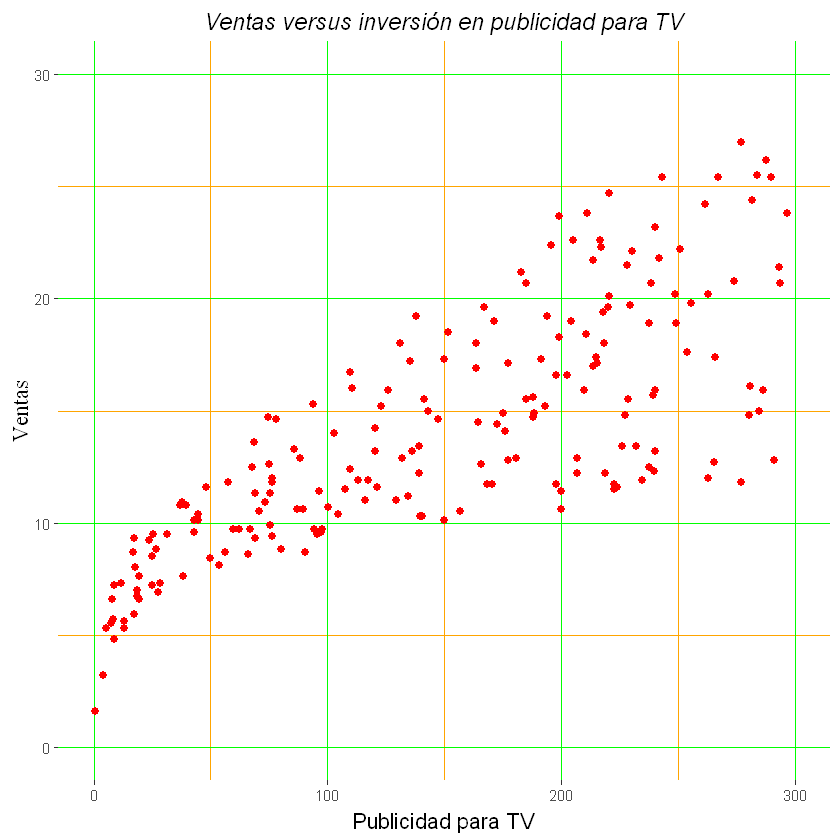

In [51]:
ggplot(advertising,aes(x=TV,y=sales)) + #aes: variables que se van a considerar
  geom_point(color="red",shape=16,size=2) + xlim(0,300) + ylim(0,30) +
  labs(title="Ventas versus inversión en publicidad para TV",
       x="Publicidad para TV",y="Ventas") +
  theme(plot.title=element_text(face="italic",size=14,vjust=0.5,hjust=0.5,color="black"),
        axis.title.x=element_text(face="plain",size=13,vjust=0.5,hjust=0.5,color="black"),
        axis.title.y=element_text(family="serif",size=13,vjust=0.5,hjust=0.5,color="black"),
        #vjust:justificar verticalmente, hjust:justificar horizontalmente
        #face:tipo letra #family:Otro argumento de letra
        panel.background=element_rect(fill="white"),
        panel.grid.major=element_line(color="green",size=0.2),
        panel.grid.minor=element_line(color="orange",size=0.2))
        #grid:grilla


* Gráfico de regresión:

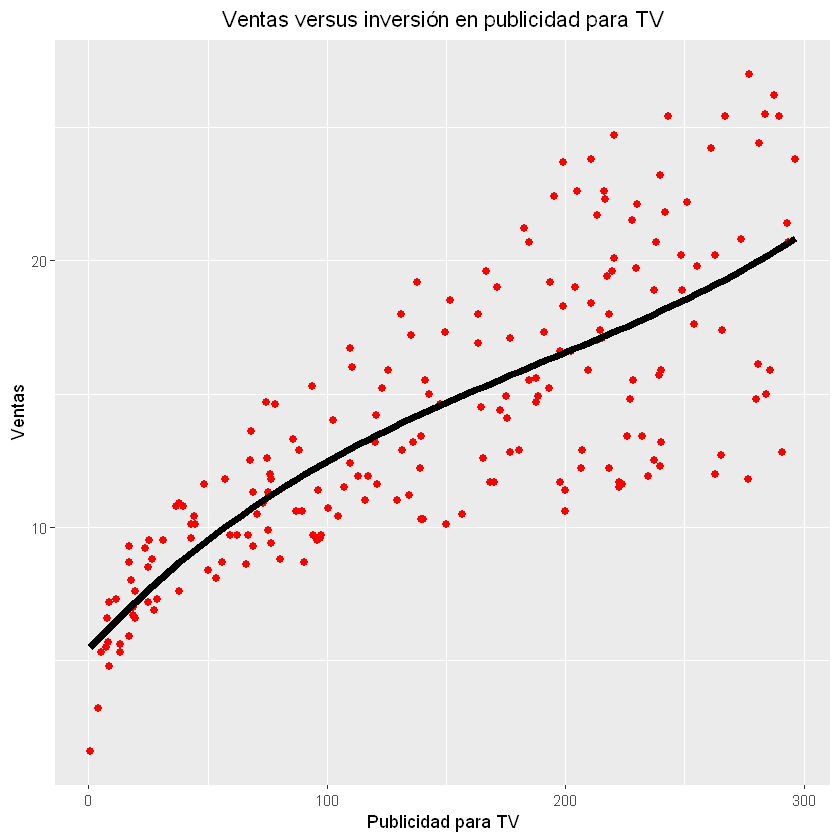

In [60]:
ggplot(advertising,aes(x=TV,y=sales)) +
  geom_point(color="red",shape=16,size=2) +
  geom_smooth(method="lm",formula=y ~ poly(x,degree=3),se=F,size=2,
              linetype="solid",color="black") +  #regresión cúbica, SE:I.C., size:grueso curva
  labs(title="Ventas versus inversión en publicidad para TV",
       x="Publicidad para TV",y="Ventas") +
  theme(plot.title = element_text(hjust = 0.5))

* Gráfico de paneles:

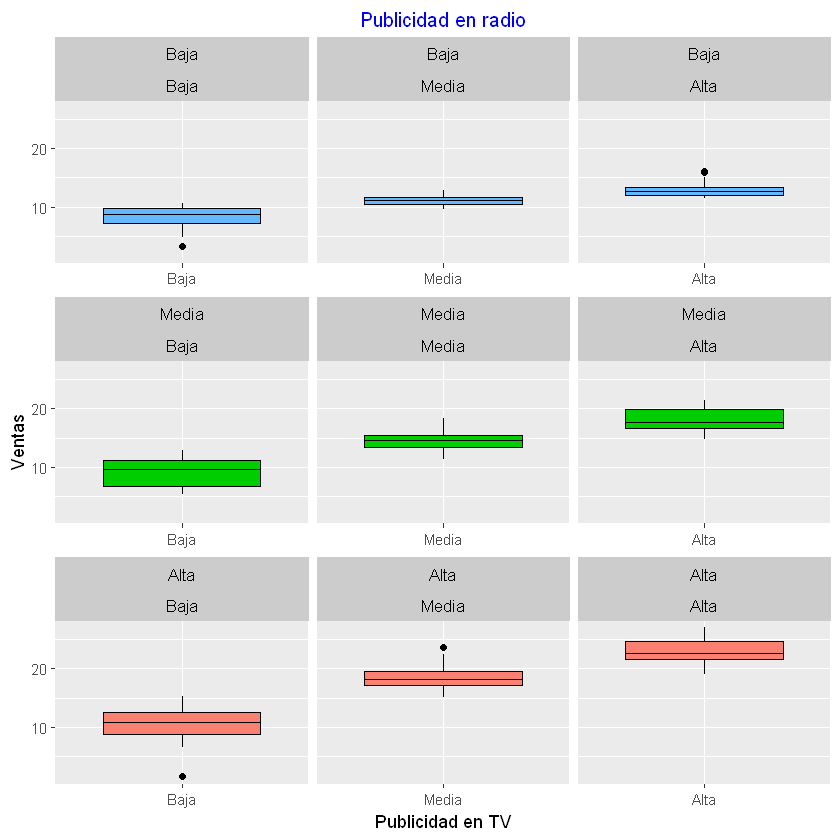

In [53]:
#within: Crear var. #with:Hacer cosas con las var.
advertising <- within(advertising,radioC <- cut_number(radio,n=3,labels=c("Baja","Media","Alta")))
              #cut_number: categorizar una var.continua, n: numero particiones, aqui se usan los percentiles, casi misma cantidad de obs. en cada uno

advertising <- within(advertising, TVC <- cut_number(TV,n=3,labels=c("Baja","Media","Alta")))

ggplot(advertising,aes(x=TVC,y=sales,fill=radioC)) + #fill: relleno depende de radioC
  geom_boxplot(color="black",linetype="solid",size=0.1) + 
  labs(x="Publicidad en TV",y="Ventas",fill="Publicidad\n en TV",
       subtitle="Publicidad en radio") +
  scale_fill_manual(values=c("steelblue1","green3","salmon","yellow")) + #Color boxplot en cada panel
  facet_wrap(vars(radioC,TVC),ncol=3,nrow=3,strip.position="top",dir="h",scales="free_x") +
  #En vars, si se pone más de 1 variab. -> panel por combinación de niveles entre ellas
  theme(
    legend.position="none",
    plot.subtitle=element_text(size=12,vjust=0.5,hjust=0.5,color="blue"),
    strip.background=element_rect(color="gray80",fill="gray80",size=1),
    strip.text=element_text(family="sans",face="plain",size=10,vjust=0.5,hjust=0.5,color="black",angle=0))


* Gráfico de densidades:

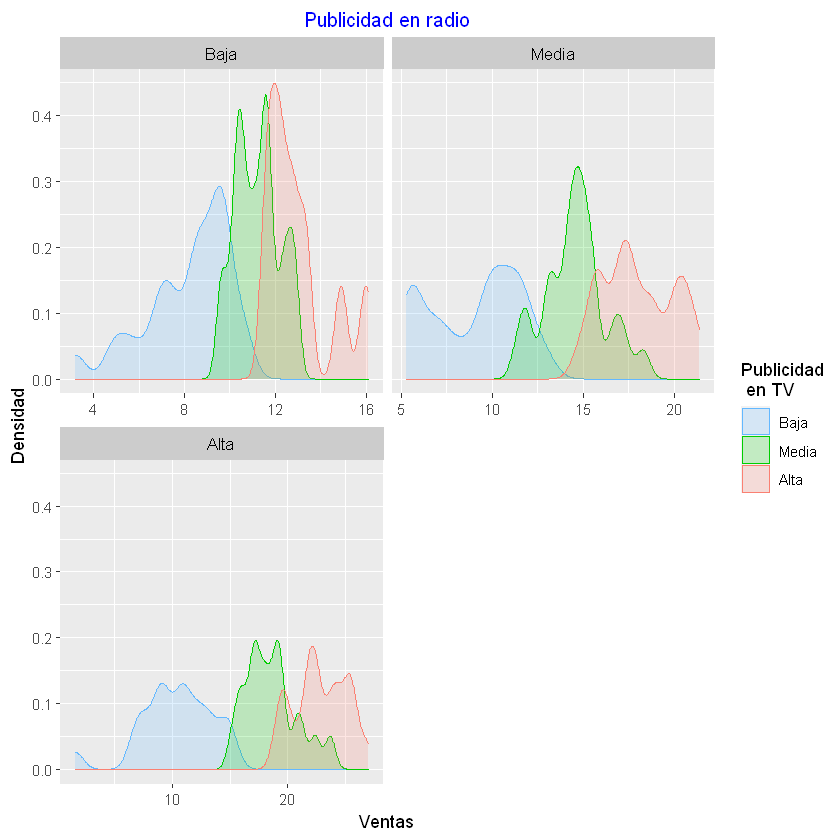

In [54]:
ggplot(advertising,aes(sales,col=TVC,fill=TVC)) + #relleno y color curva depende de TVC
  geom_density(alpha=0.2,size=0.5,adjust=0.5,linetype="solid") + #size: grueso línea, adjust:ancho de banda de kernel, alpha: grado de transparencia
  labs(x="Ventas",fill="Publicidad\n en TV",col="Publicidad\n en TV",
       subtitle="Publicidad en radio",y="Densidad") +
  scale_fill_manual(values=c("steelblue1","green3","salmon","yellow")) +
  scale_color_manual(values=c("steelblue1","green3","salmon","yellow")) +
  facet_wrap(vars(radioC),ncol=2,nrow=2,strip.position="top",dir="h",scales="free_x") +
  theme(
    plot.subtitle=element_text(size=12,vjust=0.5,hjust=0.5,color="blue"),
    strip.background=element_rect(color="gray80",fill="gray80",size=1),
    strip.text=element_text(family="sans",face="plain",size=10,vjust=0.5,hjust=0.5,color="black",angle=0))
# La probabilidades de venta, aumenta a medida de aumenta la publicidad en TV y disminuye a medida que aumenta en radio
